# Commodity Prices in USA

* [Introduction](#int)
* [Questions](#q)
    1. [Is there a correlation between gold prices and various commodity prices?](#q1)
    2. [Is there a correlation between gold prices and metal prices?](#q2)
    3. [How did food prices change over the years?](#q3)
    4. [What is the most expensive commodity in total?](#q4)
    5. [What is the cheapest commodity in total?](#q5)
    5. [What was the most expensive commodity each year?](#q6)


<h3 id="int">Introduction</h3>

* The dataset that I used is monthly prices of commodities in USA between 1992 and 2016.
* Indexes are calculated with their prices in 2005 as 100.

In [1]:
# packages
library(tidyverse)
library("scales")
library(data.table)

# load data
golddf <- read.csv("../input/gold-prices/monthly_csv.csv")
commdf <- read.csv("../input/usa-commodity-prices/commodity-prices-2016.csv")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
# clean data
commdf$Date <- as.Date(commdf$Date)
# use only years from 1992 to 2016
commdf <- commdf[commdf$Date > as.Date("1991-12-01") & commdf$Date < as.Date("2016-02-02"), ]
golddf$Date <- paste0(golddf$Date, "-01")
golddf$Date <- as.Date(golddf$Date)
golddf <- golddf[golddf$Date > as.Date("1991-12-01") & golddf$Date < as.Date("2016-02-02"), ]
prices = merge(commdf, golddf)
prices$Coffe.avg <- rowMeans(prices[,c(18:19)])
prices$Natural.gas.avg <- rowMeans(prices[,c(32:34)])
prices$Sugar.avg <- rowMeans(prices[,c(54:56)])
prices$Logs.avg <- rowMeans(prices[,c(29:30)])
prices$Wool.avg <- rowMeans(prices[,c(62:63)])
prices <- prices[, c(0:17, 20:28, 31, 35, 40:47, 50:53, 57:61, 64:70)]
colnames(prices)[which(names(prices) == "China.import.Iron.Ore.Fines.62..FE.spot")] <- "Iron.Ore"
colnames(prices)[which(names(prices) == "Swine...pork")] <- "Swine.pork"
colnames(prices)[which(names(prices) == "Price")] <- "Gold"

summary(prices)

      Date            All.Commodity.Price.Index Non.Fuel.Price.Index
 Min.   :1992-01-01   Min.   : 41.97            Min.   : 70.37      
 1st Qu.:1998-01-08   1st Qu.: 58.18            1st Qu.: 84.35      
 Median :2004-01-16   Median : 72.48            Median :100.12      
 Mean   :2004-01-15   Mean   :100.44            Mean   :115.06      
 3rd Qu.:2010-01-24   3rd Qu.:140.80            3rd Qu.:143.80      
 Max.   :2016-02-01   Max.   :219.90            Max.   :206.62      
 Food.and.Beverage.Price.Index Food.Price.Index Beverage.Price.Index
 Min.   : 75.83                Min.   : 76.04   Min.   : 60.65      
 1st Qu.: 94.27                1st Qu.: 95.25   1st Qu.: 85.11      
 Median :106.00                Median :105.42   Median :115.70      
 Mean   :119.22                Mean   :118.90   Mean   :122.15      
 3rd Qu.:144.38                3rd Qu.:142.47   3rd Qu.:157.18      
 Max.   :196.27                Max.   :194.06   Max.   :221.99      
 Industrial.Inputs.Price.Index Agr

In [3]:
# get mean of 2005 prices for creating index
prices2005 <- prices[prices$Date > as.Date("2004-12-01") & prices$Date < as.Date("2005-12-02"), ]
prices2005 <- colMeans(prices2005[,c(2:50)])
prices2005

All.Commodity.Price.Index             Non.Fuel.Price.Index 
                      100.000000                       100.000000 
   Food.and.Beverage.Price.Index                 Food.Price.Index 
                      100.000000                       100.000000 
            Beverage.Price.Index    Industrial.Inputs.Price.Index 
                      100.000000                       100.000000 
Agricultural.Raw.Materials.Index               Metals.Price.Index 
                      100.000000                       100.000000 
               Fuel.Energy.Index              Crude.Oil.petroleum 
                      100.000000                       100.000000 
                        Aluminum                          Bananas 
                     1900.514407                       576.771574 
                          Barley                             Beef 
                       95.077129                       118.729167 
                            Coal                      Cocoa.beans 
                       51.022396                      1544.661333 
                    Rapeseed.oil                           Copper 
                      720.965833                      3676.494724 
                          Cotton                         Fishmeal 
                       55.168263                       744.228029 
              Groundnuts.peanuts                            Hides 
                      769.105339                        65.641069 
                        Iron.Ore                             Lamb 
                       28.110000                       160.919787 
                            Lead                       Maize.corn 
                      974.368674                        98.405651 
                          Nickel                        Olive.Oil 
                    14777.814592                      5519.155815 
                         Oranges                         Palm.oil 
                      874.673965                       367.686896 
                      Swine.pork                  Poultry.chicken 
                       67.687052                        73.901862 
                            Rice                           Rubber 
                      287.811266                        68.119285 
                     Fish.salmon                           Shrimp 
                        4.062915                        10.338209 
                    Soybean.Meal                      Soybean.Oil 
                      205.762066                       495.747251 
                        Soybeans                    Sunflower.oil 
                      223.133675                      1144.540103 
                             Tea                              Tin 
                      216.379167                      7385.248115 
                         Uranium                            Wheat 
                       27.930870                       129.885698 
                            Zinc                             Gold 
                     1380.547473                       444.905167 
                       Coffe.avg                  Natural.gas.avg 
                       83.848604                         7.269837 
                       Sugar.avg 
                       20.466992

In [ ]:
# gold index is calculated
prices$Gold.index <- prices$Gold*100/prices2005["Gold"]

<h3 id="q">Questions</h3>
<h4 id="q1">1. Is there a correlation between gold prices and various commodity prices?</h4>

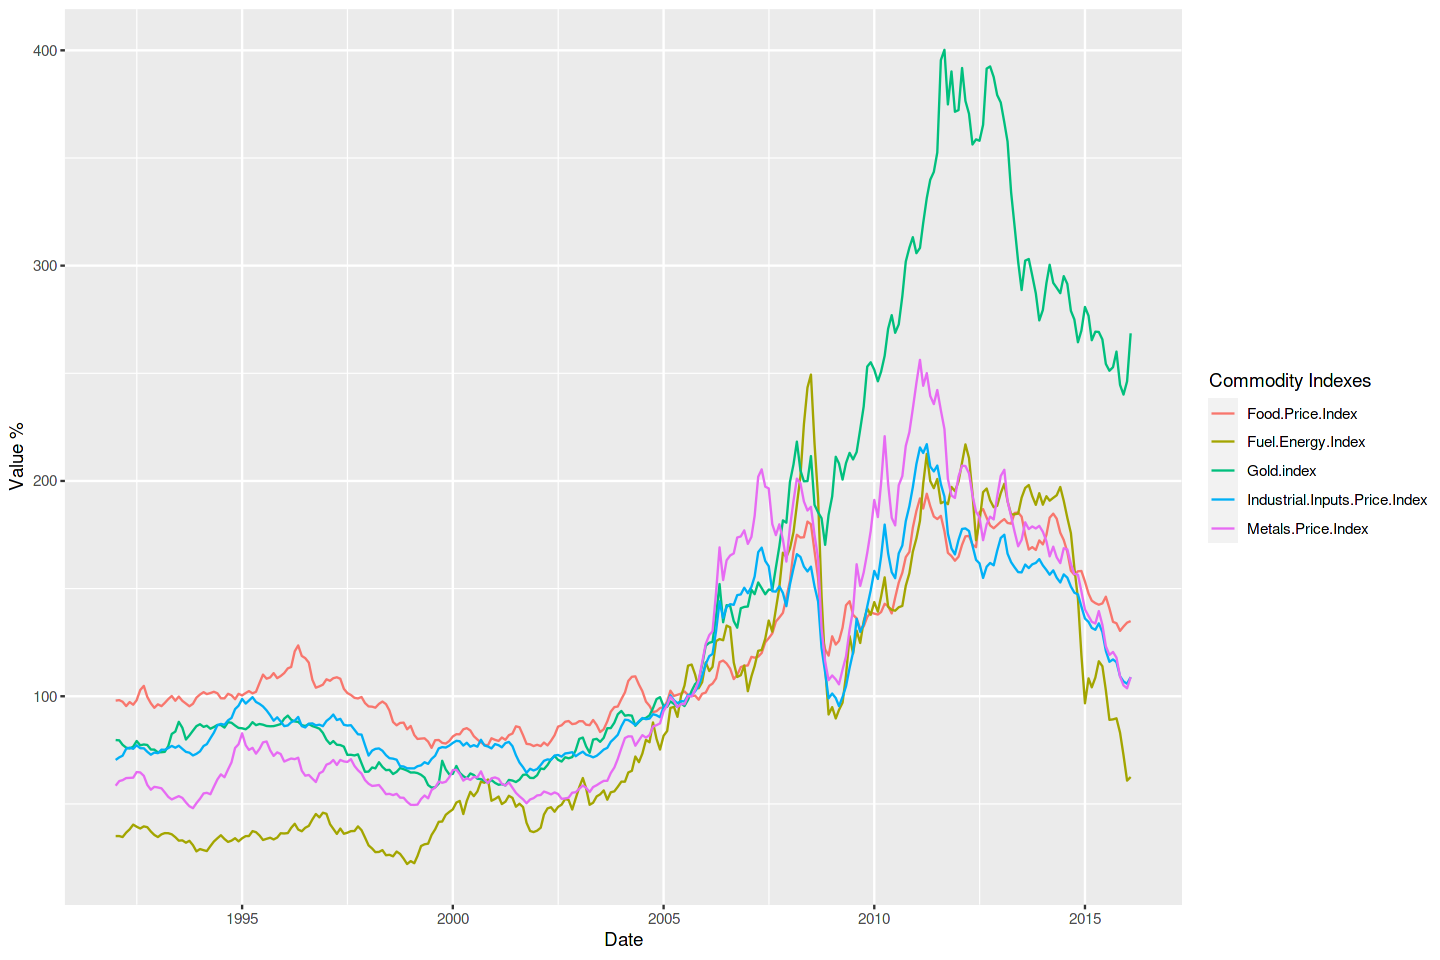

In [5]:
df <- prices %>%
  select(Date, Gold.index, Food.Price.Index, Industrial.Inputs.Price.Index, Metals.Price.Index, Fuel.Energy.Index) %>%
  gather(key = "variable", value = "value", -Date)
options(repr.plot.width = 12, repr.plot.height = 8)
p.index <- ggplot(df, aes(x =Date, y = value)) + 
  geom_line(aes(color = variable)) + ylab("Value %")
p.index$labels$colour <- "Commodity Indexes"
p.index

* Most similar index is metals price index
* Gold prices are rising more than any commodity after 2008.

<h4 id="q2">2. Is there a correlation between gold prices and metal prices?</h4>

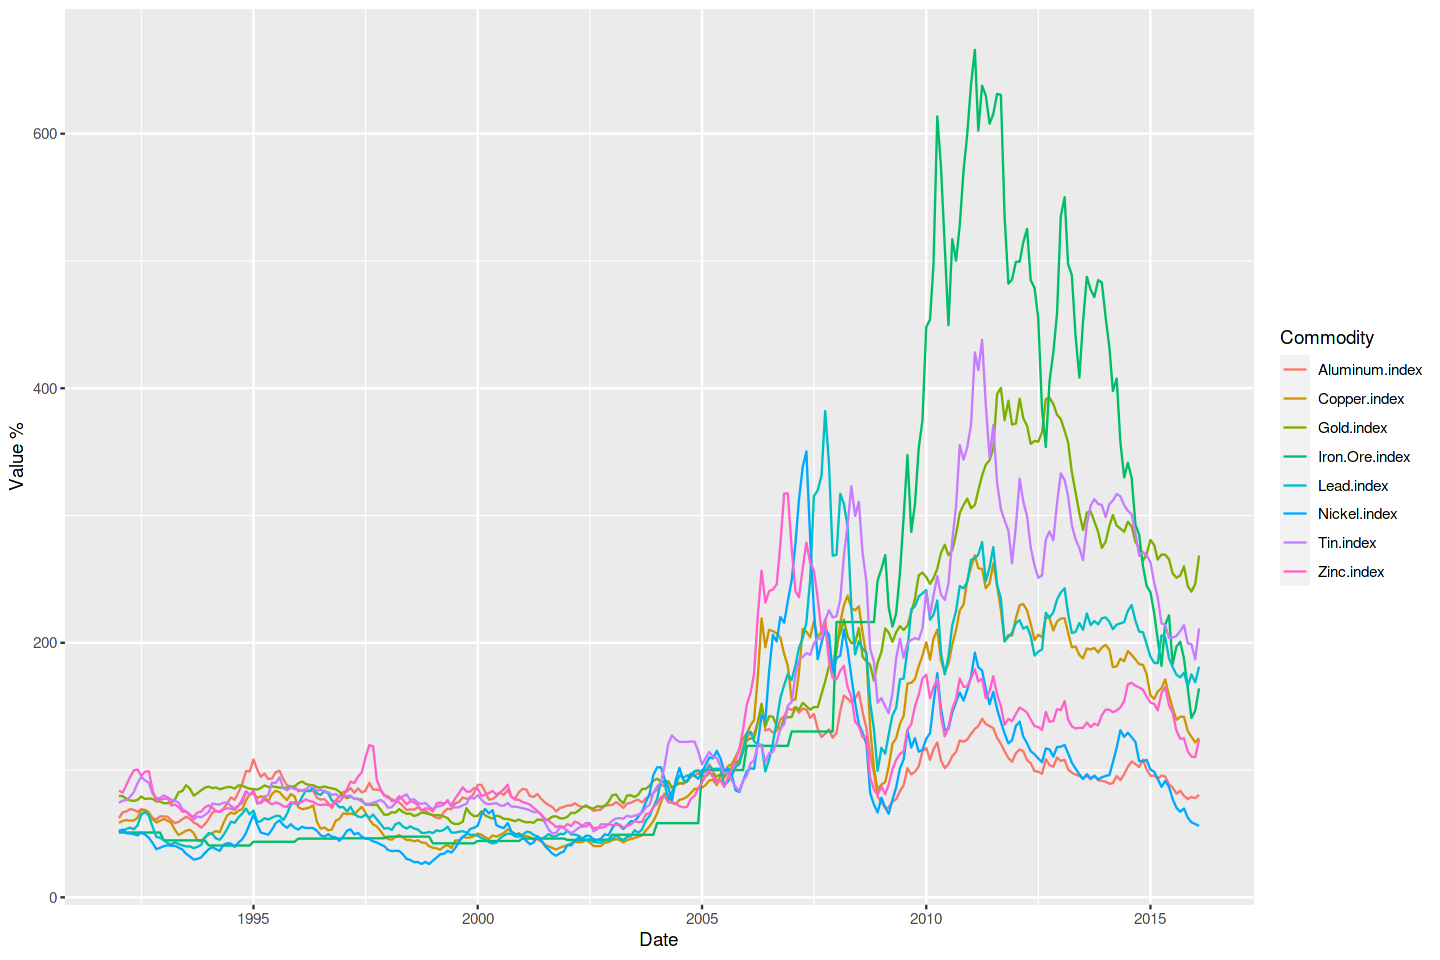

In [6]:
# other metal indexes are calculated
prices$Aluminum.index <- prices$Aluminum*100/prices2005["Aluminum"]
prices$Copper.index <- prices$Copper*100/prices2005["Copper"]
prices$Iron.Ore.index <- prices$Iron.Ore*100/prices2005["Iron.Ore"]
prices$Lead.index <- prices$Lead*100/prices2005["Lead"]
prices$Nickel.index <- prices$Nickel*100/prices2005["Nickel"]
prices$Tin.index <- prices$Tin*100/prices2005["Tin"]
prices$Zinc.index <- prices$Zinc*100/prices2005["Zinc"]

df <- prices %>%
  select(Date, Gold.index, Aluminum.index, Copper.index, Iron.Ore.index, Lead.index, Nickel.index, Tin.index, Zinc.index) %>%
  gather(key = "variable", value = "value", -Date)

p.metal <- ggplot(df, aes(x = Date, y = value)) + 
  geom_line(aes(color = variable)) + ylab("Value %")
p.metal$labels$colour <- "Commodity"
p.metal

* Most correlation is between gold and tin. 
* Iron actually rises even more then gold after 2009.

<h4 id="q3">3. How did food prices change over the years?</h4>

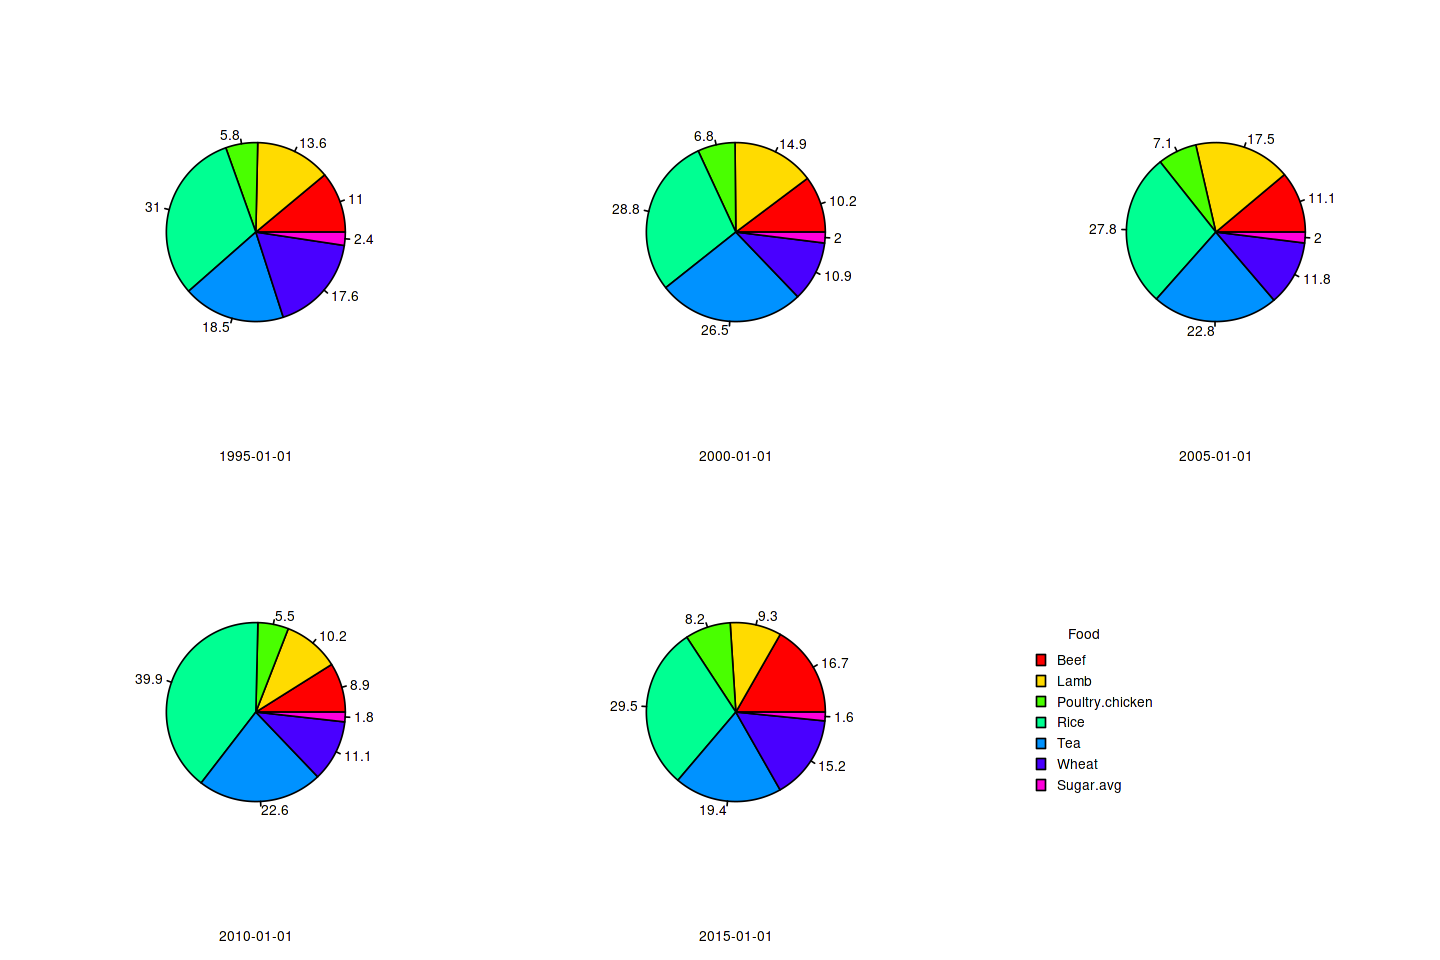

In [7]:
par(mfrow=c(2,3))
labeling <- c( prices$Beef[prices$Date==as.Date("1995-01-01")],
  prices$Lamb[prices$Date==as.Date("1995-01-01")],
  prices$Poultry.chicken[prices$Date==as.Date("1995-01-01")],
  prices$Rice[prices$Date==as.Date("1995-01-01")],
  prices$Tea[prices$Date==as.Date("1995-01-01")],
  prices$Wheat[prices$Date==as.Date("1995-01-01")],
  prices$Sugar.avg[prices$Date==as.Date("1995-01-01")])
pie(labeling, xlab="1995-01-01", labels=round(100*labeling/sum(labeling), 1), col = rainbow(length(labeling)))
labeling <-c(
  prices$Beef[prices$Date==as.Date("2000-01-01")],
  prices$Lamb[prices$Date==as.Date("2000-01-01")],
  prices$Poultry.chicken[prices$Date==as.Date("2000-01-01")],
  prices$Rice[prices$Date==as.Date("2000-01-01")],
  prices$Tea[prices$Date==as.Date("2000-01-01")],
  prices$Wheat[prices$Date==as.Date("2000-01-01")],
  prices$Sugar.avg[prices$Date==as.Date("2000-01-01")])
pie(labeling, xlab="2000-01-01", labels=round(100*labeling/sum(labeling), 1), col = rainbow(length(labeling)))
labeling <-c(
  prices$Beef[prices$Date==as.Date("2005-01-01")],
  prices$Lamb[prices$Date==as.Date("2005-01-01")],
  prices$Poultry.chicken[prices$Date==as.Date("2005-01-01")],
  prices$Rice[prices$Date==as.Date("2005-01-01")],
  prices$Tea[prices$Date==as.Date("2005-01-01")],
  prices$Wheat[prices$Date==as.Date("2005-01-01")],
  prices$Sugar.avg[prices$Date==as.Date("2005-01-01")])
pie(labeling, xlab="2005-01-01", labels=round(100*labeling/sum(labeling), 1), col = rainbow(length(labeling)))
labeling <-c(
  prices$Beef[prices$Date==as.Date("2010-01-01")],
  prices$Lamb[prices$Date==as.Date("2010-01-01")],
  prices$Poultry.chicken[prices$Date==as.Date("2010-01-01")],
  prices$Rice[prices$Date==as.Date("2010-01-01")],
  prices$Tea[prices$Date==as.Date("2010-01-01")],
  prices$Wheat[prices$Date==as.Date("2010-01-01")],
  prices$Sugar.avg[prices$Date==as.Date("2010-01-01")])
pie(labeling, xlab="2010-01-01", labels=round(100*labeling/sum(labeling), 1), col = rainbow(length(labeling)))
labeling <-c(
  prices$Beef[prices$Date==as.Date("2015-01-01")],
  prices$Lamb[prices$Date==as.Date("2015-01-01")],
  prices$Poultry.chicken[prices$Date==as.Date("2015-01-01")],
  prices$Rice[prices$Date==as.Date("2015-01-01")],
  prices$Tea[prices$Date==as.Date("2015-01-01")],
  prices$Wheat[prices$Date==as.Date("2015-01-01")],
  prices$Sugar.avg[prices$Date==as.Date("2015-01-01")])
pie(labeling, xlab="2015-01-01", labels=round(100*labeling/sum(labeling), 1), col = rainbow(length(labeling)))
plot.new()
legend("left",legend=c("Beef", "Lamb", "Poultry.chicken", "Rice", "Tea", "Wheat", "Sugar.avg"), box.lty=0, title="Food", fill = rainbow(length(labeling)))

* Food commodities and their proportions every 5 years.
* It doesn’t chance much.
* Only in 2010 the rice prices has risen a bit.
* Also beef and wheat is more expensive in recent years.

<h4 id="q4">4. What is the most expensive commodity in total? </h4>

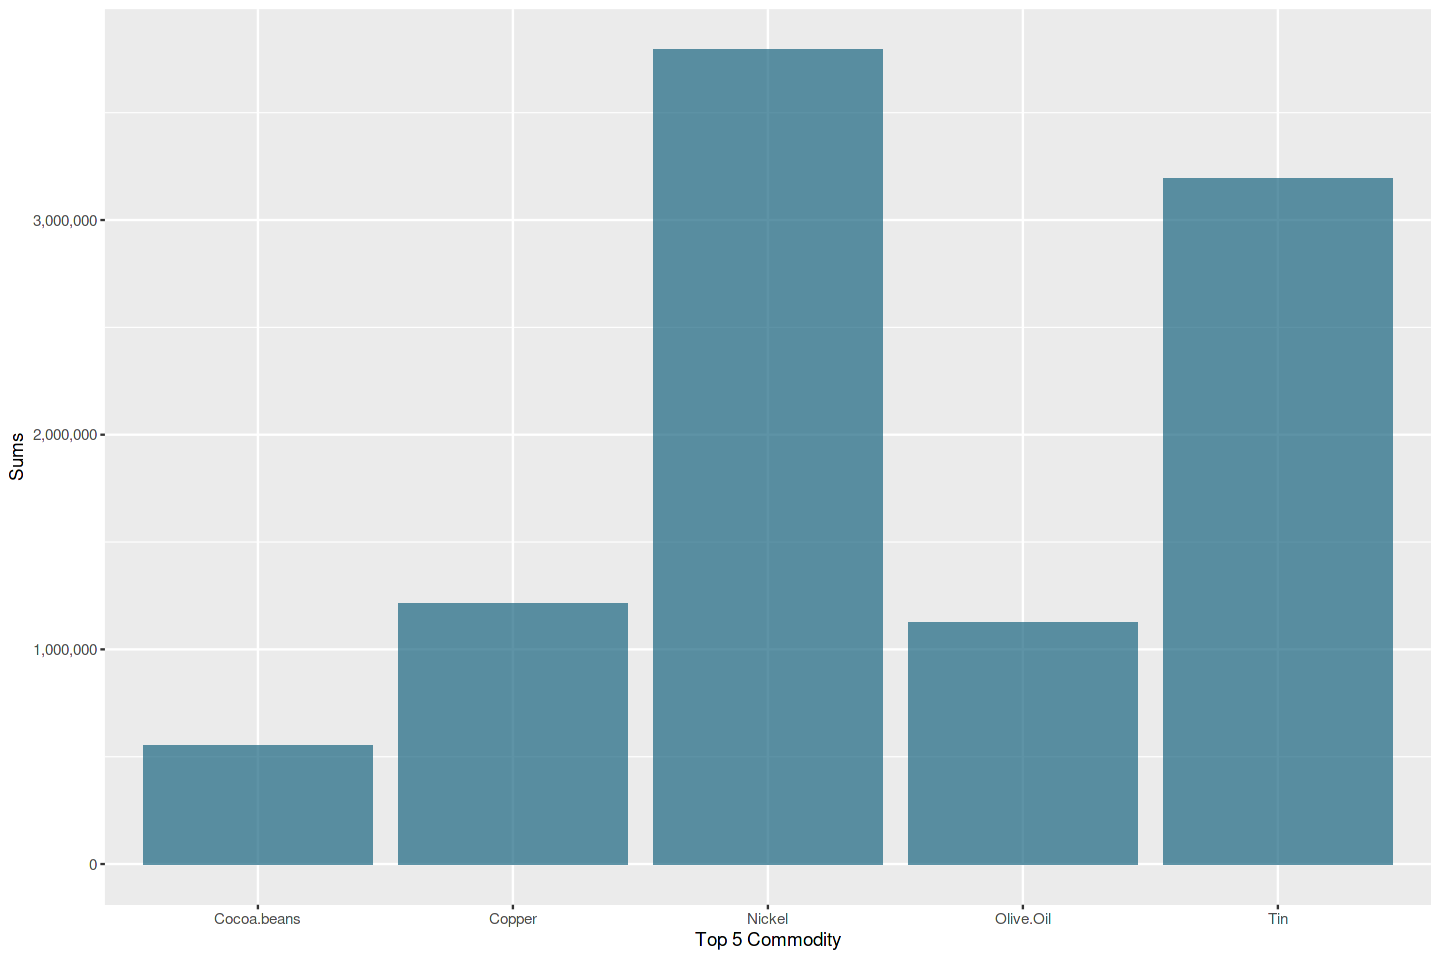

In [8]:
sum.prices <- colSums(prices[,(2:60)])
sum.pricesde <- data.frame(Sums=sort(sum.prices, decreasing=TRUE))
sum.pricesde <- setDT(sum.pricesde, keep.rownames = TRUE)[]
sum.pricesde <-sum.pricesde[1:5,]

ggplot(sum.pricesde, aes(x = rn, y = Sums)) + 
  geom_bar(fill=rgb(0.1,0.4,0.5,0.7) , stat="identity") + xlab("Top 5 Commodity")+ scale_y_continuous(labels = comma)


<h4 id="q5">5. What is the cheapest commodity in total? </h4>

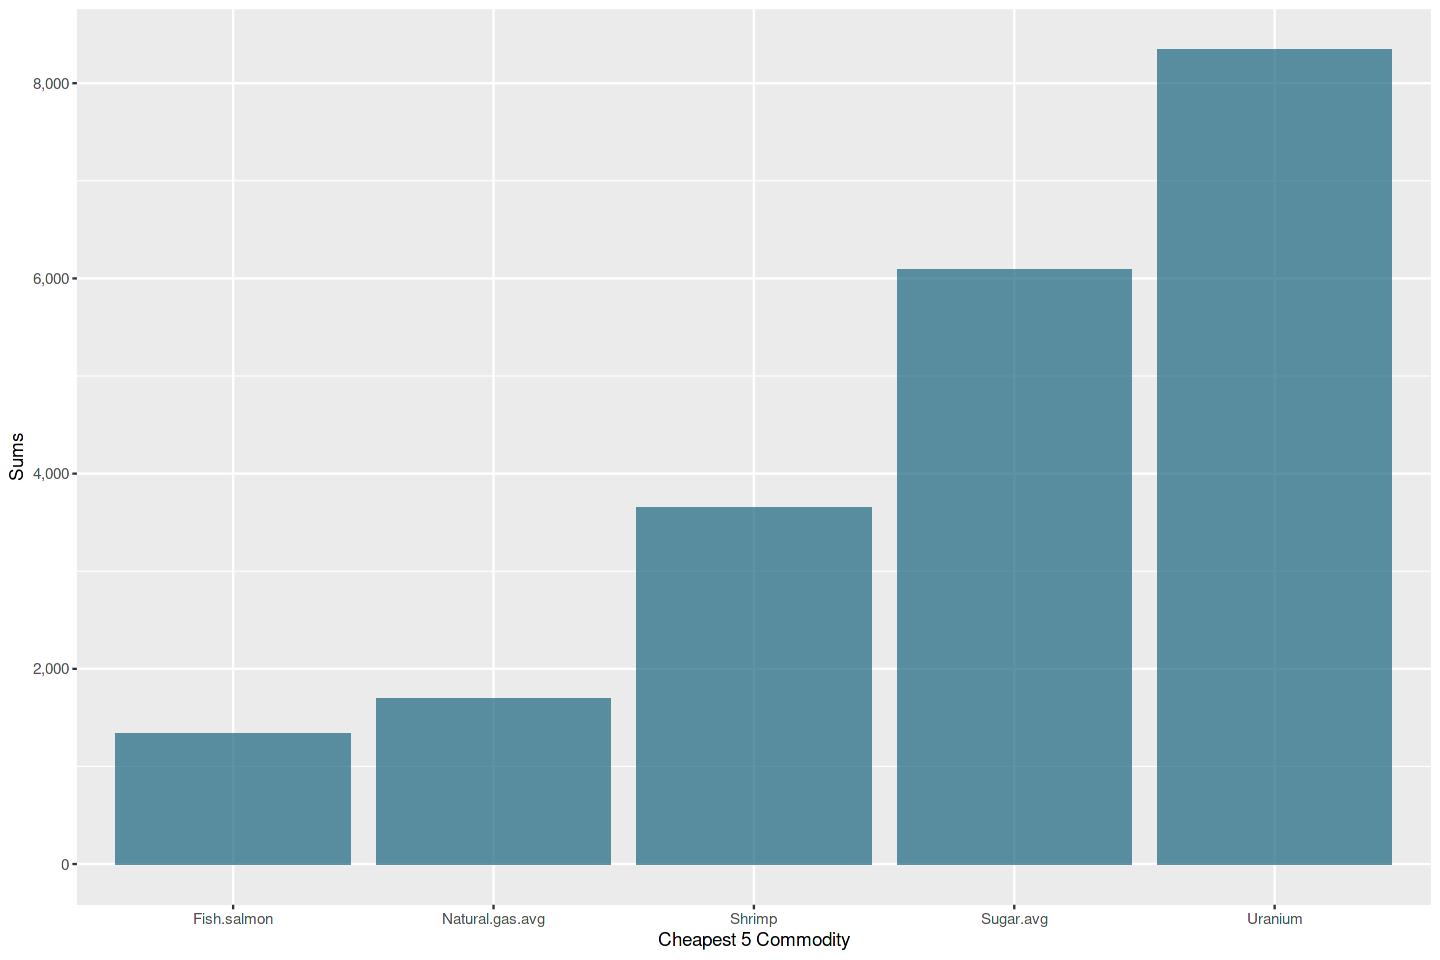

In [9]:
sum.pricesin <- data.frame(Sums=sort(sum.prices, decreasing=FALSE))
sum.pricesin <- setDT(sum.pricesin, keep.rownames = TRUE)[]
sum.pricesin <-sum.pricesin[1:5,]

ggplot(sum.pricesin, aes(x = rn, y = Sums)) + 
  geom_bar(fill=rgb(0.1,0.4,0.5,0.7) , stat="identity") + xlab("Cheapest 5 Commodity")+ scale_y_continuous(labels = comma)


<h4 id="q6">6. What was the most expensive commodity each year? </h4>

In [10]:
# calculating each year
years <- format(prices$Date, "%Y")
dfsum <- data.frame()
for (i in 12:52) {
  dfsum <- rbind(dfsum,c(tapply(prices[,i], years, mean)))
}
colnames(dfsum) <- 1992:2016
row.names(dfsum) <- colnames(prices[,12:52])
dfsum

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,⋯,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aluminum,1256.274994,1139.930776,1475.629690,1805.020487,1506.793915,1599.294444,1357.571696,1359.988809,1551.497787,1446.746570,⋯,2639.860788,2577.915859,1669.175158,2173.004640,2400.643325,2022.795380,1846.676927,1867.421061,1664.680673,1506.180952
Bananas,473.083333,443.025833,439.790833,445.102500,469.584167,522.559853,492.184622,373.918048,422.273922,584.694580,⋯,676.925424,843.629753,847.951197,881.418018,975.914308,984.281644,926.353598,931.875353,958.708707,1031.800842
Barley,78.675190,71.376916,72.648985,104.011894,119.665099,97.237180,85.054020,75.937005,77.234862,93.936141,⋯,172.381217,200.476164,128.381314,158.374474,207.219237,238.229099,206.360338,146.089154,127.865278,119.034170
Beef,111.335523,118.738223,105.817864,86.501792,80.969797,84.168420,78.294998,83.139350,87.789126,96.540796,⋯,118.038333,121.103472,119.622917,152.474558,183.178349,187.942903,183.588499,224.058434,200.494371,165.190476
Coal,38.562500,31.333333,32.300000,39.371667,38.074167,35.099167,29.230833,25.891667,26.250000,32.312500,⋯,70.428348,136.183036,76.975893,106.035045,130.123214,103.247321,90.602324,75.139286,61.618618,53.954799
Cocoa.beans,1099.419983,1111.271067,1395.682271,1432.542053,1455.249786,1618.743256,1676.003459,1135.049406,903.906362,1088.375794,⋯,1958.110966,2572.758914,2895.024838,3130.596518,2978.490741,2377.069389,2439.091470,3062.764280,3135.165090,2934.391311
Rapeseed.oil,405.097500,460.882500,621.263333,632.710833,563.070000,562.832500,630.475000,428.688333,346.240000,391.879167,⋯,1011.855000,1423.710000,856.178333,1011.747868,1366.627336,1239.081341,1081.218666,904.368271,774.608906,778.419786
Copper,2284.812228,1914.956073,2305.531505,2932.036434,2293.386377,2275.187130,1653.707487,1572.525107,1814.523973,1580.168974,⋯,7131.630016,6963.481998,5165.302491,7538.370862,8823.454246,7958.924678,7331.490765,6863.396581,5510.457113,4535.203274
Cotton,57.933959,58.019416,79.715693,98.300798,80.539667,79.228666,65.530375,53.126085,59.047715,47.996912,⋯,63.283692,71.399863,62.752034,103.544546,154.608337,89.240967,90.400613,83.096741,70.417182,67.660714


In [11]:
# most expensive every year
for (i in 1:25) {
print(rownames(dfsum)[which.max(dfsum[,i])])
}

[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Tin"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Nickel"
[1] "Tin"
[1] "Tin"
[1] "Tin"
[1] "Tin"
[1] "Tin"
[1] "Tin"


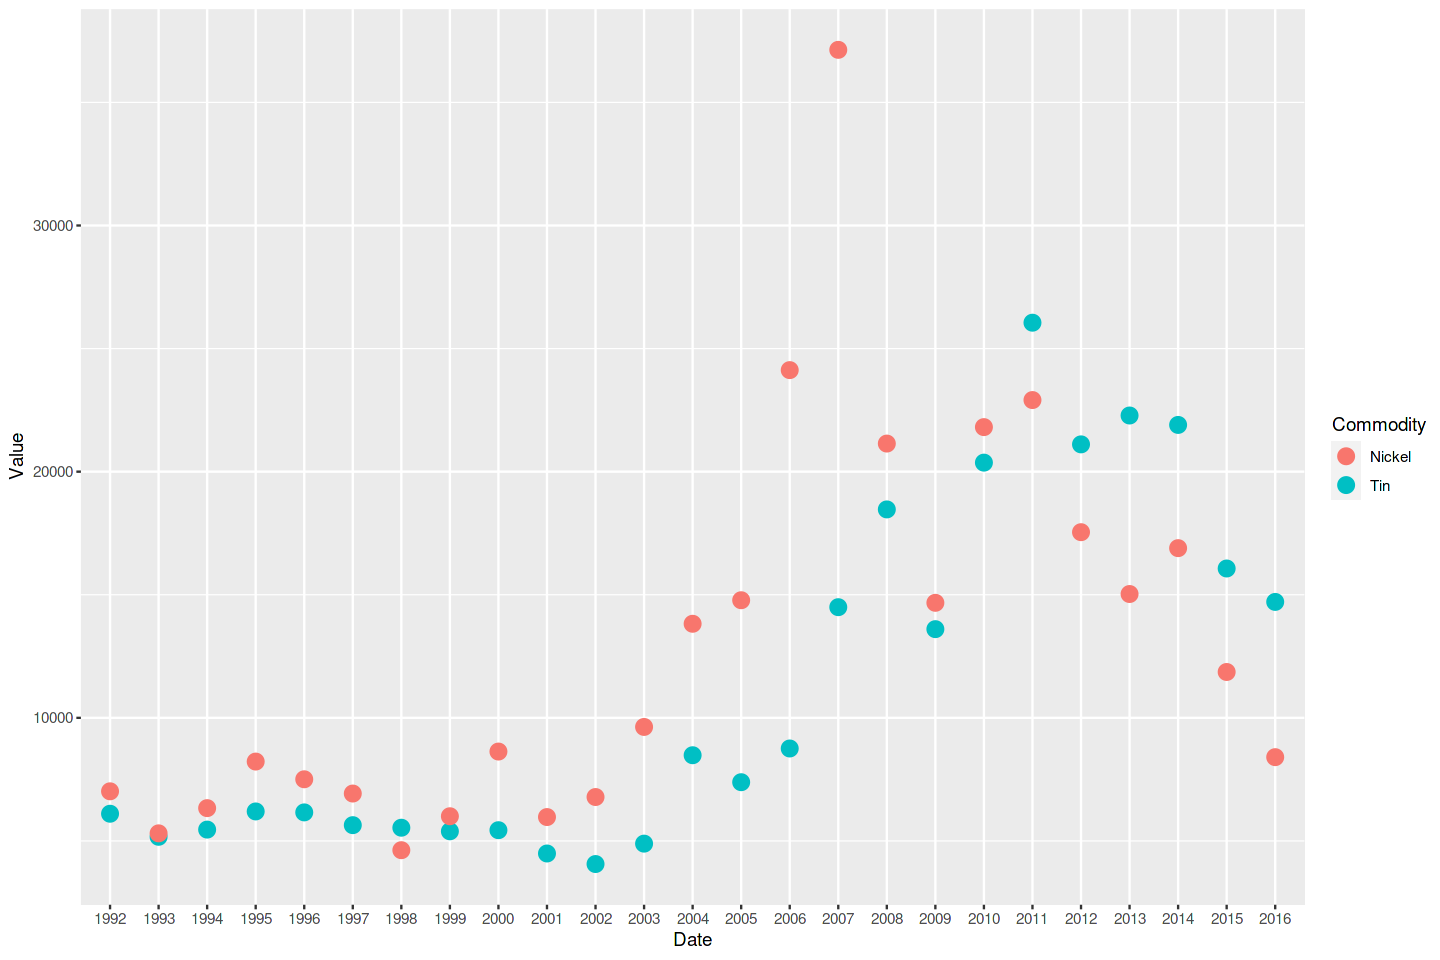

In [12]:
# as a graph
dfsum <- setDT(dfsum, keep.rownames = TRUE)[]
longer_data <- dfsum[c(32,17),]
longer_data <- longer_data %>%
  pivot_longer(2:26, names_to = "Date", values_to = "Value")

p.year <- ggplot(longer_data, aes(y = Value, x = Date)) +
  geom_point(aes(color = rn), size = 4)
p.year$labels$colour <- "Commodity"
p.year

* There is an interesting spike in 2007 in nickel.
* In resent years tin is more expensive.